In [91]:
from pprint import pprint
from typing import List
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def pareto_max(losses: np.ndarray, ndigits: int = 3) -> List[int]:
    assert losses.shape[-1] == 2
    best: Dict[float, Tuple[int, float]] = dict()
    for i, [x, y] in enumerate(losses.round(ndigits)):
        (x, y) = (float(x), float(y))
        if x in best:
            (_, y_) = best[x]
            if y > y_:
                best[x] = (i, y)
        else:
            best[x] = (i, y)
    return [i for (i, _) in best.values()]

def read(p: str):
    df = pd.read_json(p)
    # Interested in a high lower bound on recall and a low upper bound on duration.
    df['rec_p05'] = df['recalls'].apply(lambda rr: np.percentile(rr, 5))
    df['dur_p95'] = df['durations'].apply(lambda dd: np.percentile(dd, 95))
    return df.drop(['recalls', 'durations'], axis=1)
    
rdf = read('/tmp/results.json')
rdf

,dataset,mapping,query,k,rec_p05,dur_p95
0,AmazonHomePhash,"{'type': 'elastiknn_sparse_bool_vector', 'elas...","{'field': 'vec', 'vec': {}, 'similarity': 'ham...",10,0.900,81.8
1,AmazonHomePhash,"{'type': 'elastiknn_sparse_bool_vector', 'elas...","{'field': 'vec', 'vec': {}, 'candidates': 10, ...",10,0.100,18.8
2,AmazonHomePhash,"{'type': 'elastiknn_sparse_bool_vector', 'elas...","{'field': 'vec', 'vec': {}, 'candidates': 20, ...",10,0.100,16.8
3,AmazonHomePhash,"{'type': 'elastiknn_sparse_bool_vector', 'elas...","{'field': 'vec', 'vec': {}, 'candidates': 100,...",10,0.520,20.6
4,AmazonHomePhash,"{'type': 'elastiknn_sparse_bool_vector', 'elas...","{'field': 'vec', 'vec': {}, 'candidates': 10, ...",10,0.220,86.6
5,AmazonHomePhash,"{'type': 'elastiknn_sparse_bool_vector', 'elas...","{'field': 'vec', 'vec': {}, 'candidates': 20, ...",10,0.320,89.4
6,AmazonHomePhash,"{'type': 'elastiknn_sparse_bool_vector', 'elas...","{'field': 'vec', 'vec': {}, 'candidates': 100,...",10,0.700,91.8
7,AmazonHomePhash,"{'type': 'elastiknn_sparse_bool_vector', 'elas...","{'field': 'vec', 'vec': {}, 'candidates': 10, ...",10,0.400,148.4
8,AmazonHomePhash,"{'type': 'elastiknn_sparse_bool_vector', 'elas...","{'field': 'vec', 'vec': {}, 'candidates': 20, ...",10,0.600,150.6
9,AmazonHomePhash,"{'type': 'elastiknn_sparse_bool_vector', 'elas...","{'field': 'vec', 'vec': {}, 'candidates': 100,...",10,0.800,212.8


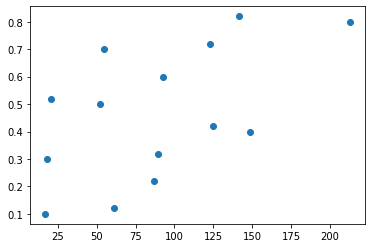

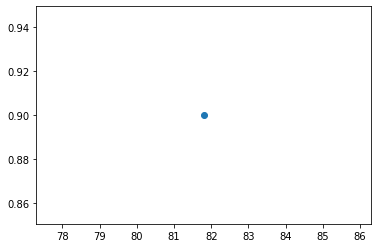

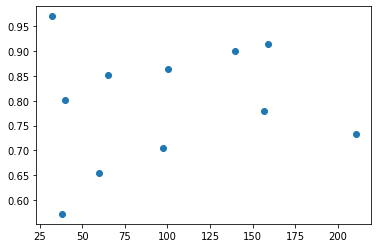

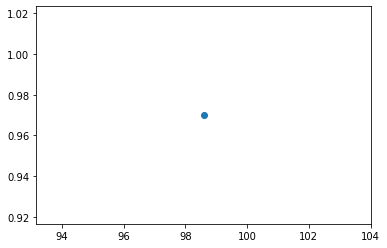

In [92]:
# Compute the pareto curve for each (dataset, k, mapping).

def pareto(recalls: List[float], durations: List[float], ndigits: int = 2):
    """For each unique recall, find the index with the lowest duration."""
    best: Dict[float, Tuple[int, float]] = dict()
    for i, (r, d) in enumerate(zip(recalls, durations)):
        rr = round(r, ndigits)
        if rr in best:
            (_, d_) = best[rr]
            if d < d_:
                best[rr] = (i, d)
        else:
            best[rr] = (i, d)
    ii_jagged = [i for (i, _) in best.values()]
    return ii_jagged


for ((dataset, k), df) in rdf.groupby(['dataset', 'k']):
    df = df.copy() # Make pandas stop complaining.
    df['model'] = df['mapping'].apply(lambda x: x['elastiknn']['model'])
    for (mapping, df) in df.groupby('model'):
        prtidx = pareto(df['rec_p05'], df['dur_p95'])
        plt.scatter(df['dur_p95'].values[prtidx], df['rec_p05'].values[prtidx])
        plt.show()
        
        
        
    
